<a href="https://colab.research.google.com/github/JChengecha/titanic_and_spam_datasets_projects/blob/main/K_nearest_neighbor_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # The Research Question





The Titanic was a British passenger liner that sank in the North Atlantic Ocean after it collided with an iceberg during its maiden voyage from Southampton to New York City.

Here, we are asked to predict whether a passenger on the titanic would have survived or not.

### The Metric for Success

To come with an optimized KNN model that would predict if a passenger would have survived or not

###  The Experimental Design

* Checking for data quality
* data cleaning
* Categorical Encoding
* modelling and making predictions: This step will mostly entail splitting our training set further and training our model on it and evaluating the performance. Later, checking how the model will perform, the test dataset will then be incorporated to the model 

Dataset Source: 
* Train Dataset Source: [Link](https://archive.org/download/train5_202002/train%20%285%29.csv),
* Test Dataset Source: [Link](https://archive.org/download/test1_202002/test%20%281%29.csv)

# Reading & Checking the Dataset

In [25]:
# importing some libraries
import pandas as pd
import numpy as np

In [26]:
# reading the respective datasets
df1=pd.read_csv('https://archive.org/download/train5_202002/train%20%285%29.csv')
df2=pd.read_csv('https://archive.org/download/test1_202002/test%20%281%29.csv')

#### Checking the first dataset

In [27]:
# checking the first rows of the data
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
# checking the last rows of the data

df1.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [29]:
# checking the information of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### checking the second dataset

In [30]:
# checking the first rows of the data
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
# checking the last rows of the data

df2.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [32]:
# checking the information of the dataset

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Data cleaning

In [33]:
# changing all column name letters to lower case for easy coding 
df1.columns=df1.columns.str.lower()
df2.columns=df2.columns.str.lower()

In [34]:
# dropping the unnecessary columns
df1.drop(['name','ticket'],axis=1,inplace=True)

df2.drop(['name','ticket'],axis=1,inplace=True)

#### checking for null values

In [35]:
df1.isnull().sum()

passengerid      0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
cabin          687
embarked         2
dtype: int64

In [36]:
df2.isnull().sum()

passengerid      0
pclass           0
sex              0
age             86
sibsp            0
parch            0
fare             1
cabin          327
embarked         0
dtype: int64

In [37]:
# checking for the most embarked port in the first data
df1['embarked'].mode()

0    S
dtype: object

In [38]:
# filling the null values for the embarked  feature 
df1['embarked'].fillna('S',inplace=True)

# filling in the null values for the 'fare' feature using the its mean
df2['fare'].fillna(df2['fare'].mean(),inplace=True)

In [39]:
# filling the null values for age with its mean in both datasets
df1['age'].fillna(df1['age'].mean(),inplace=True)
df2['age'].fillna(df2['age'].mean(),inplace=True)

# ensuring there are no null values
print(df1.isnull().sum(),'\n')
print(df2.isnull().sum())

passengerid      0
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
cabin          687
embarked         0
dtype: int64 

passengerid      0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
cabin          327
embarked         0
dtype: int64


The cabin column has null values in more than half the number of  rows in their respective datasets. Replacing the null values may lead to some degree of biasness   

In [40]:
# dropping the column name Cabin
df1.drop('cabin',1,inplace=True)
df2.drop('cabin',1,inplace=True)

#### Checking for duplicated data

In [41]:
print('Duplicates for the training dataset : ', df1.duplicated().sum())
print('\nDuplicates for the test dataset : ', df2.duplicated().sum())

Duplicates for the training dataset :  0

Duplicates for the test dataset :  0


#### checking for outliers



checking for outliers in the continuous features

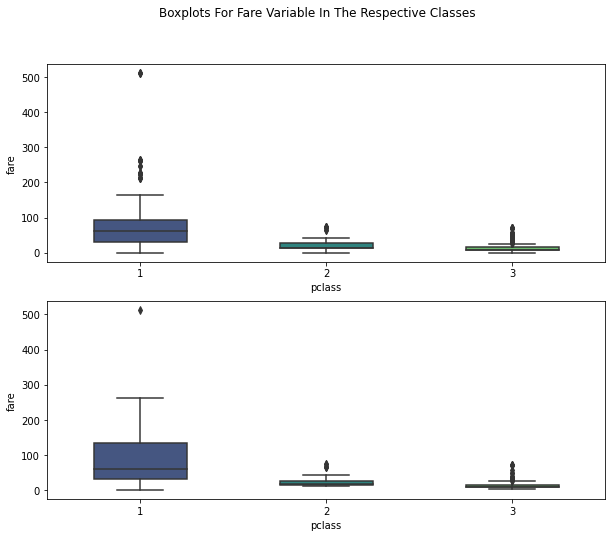

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ((ax1, ax2)) = plt.subplots(2, figsize=(10, 8))

fig.suptitle('Boxplots For Fare Variable In The Respective Classes')

sns.boxplot(y='fare', x='pclass', data=df1, width=0.5, palette="viridis",ax=ax1)

sns.boxplot(y='fare', x='pclass', data=df2, width=0.5, palette="viridis",ax=ax2)
plt.show()

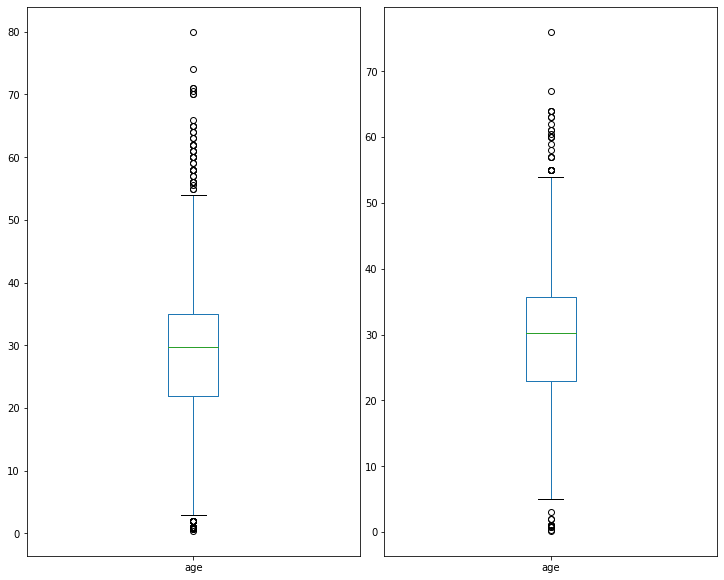

In [43]:
plt.subplot(121)
df1['age'].plot.box(figsize=(10,8))
plt.tight_layout(pad=0.5)

plt.subplot(122)
df2['age'].plot.box()
plt.tight_layout(pad=0.5)

 There are outliers for both age and fare in the train and test datasets.
* The 'fare' feature shows there are still some outliers even after placing them in their respective classes.
* Dropping these features would result to loss of information necessary for modelling


#  Exploratory Analysis

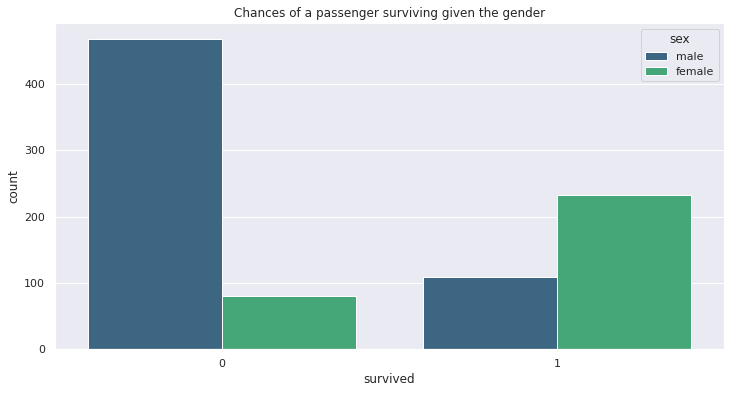

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline


sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='survived',hue='sex',data=df1,palette='viridis')
plt.title('Chances of a passenger surviving given the gender')
plt.show()

insights:
* Female passengers had a higher chance of surviving
* The number of passengers who did not survive was way more than the number of passengers who survived.

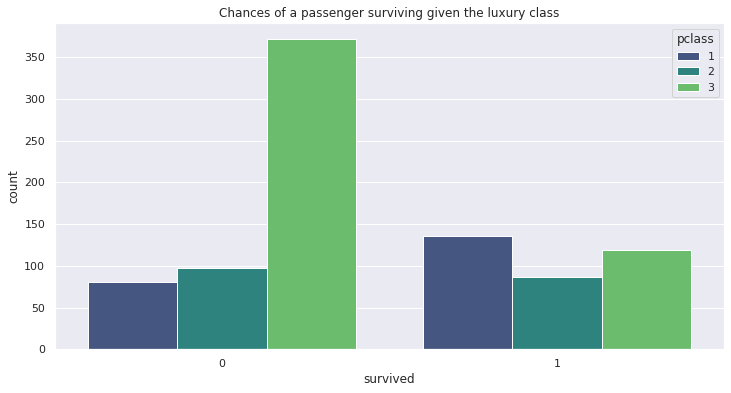

In [45]:
sns.countplot(x='survived',hue='pclass',data=df1,palette='viridis')
plt.title('Chances of a passenger surviving given the luxury class')
plt.show()

Insights:
* passengers in the third class had the highest chance of not surviving while the second class had the lowest chance of surviving.
* first class had the highest chance of surviving 

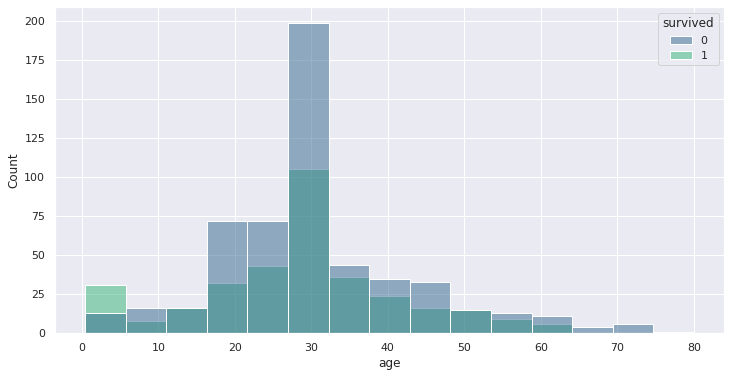

In [46]:
sns.histplot(data=df1,x='age',hue='survived',bins=15,palette='viridis')
plt.show()

insights:
* the histogram shows that passengers between the ages 18 and 30 did not surviving. of interesting to note, passengers at age 30 had the highest chances of surviving.
* children less than 5 years had higher chance of surviving

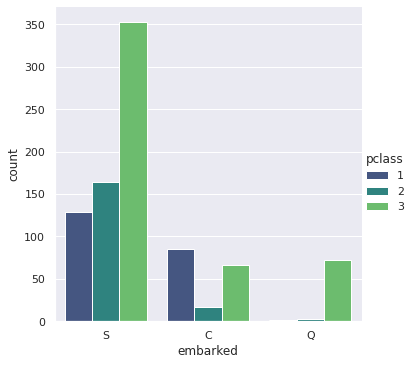

In [47]:
sns.catplot(x='embarked', data=df1, kind='count',hue='pclass',palette='viridis', row_order=['C','Q','S'])
plt.show()

insights:
* S had the highest number of passengers followed by C.
* the number of third class passengers were significantly higher at S and Q.
* C had fewer number of passengers than S but most of the passengers had settled for first class.


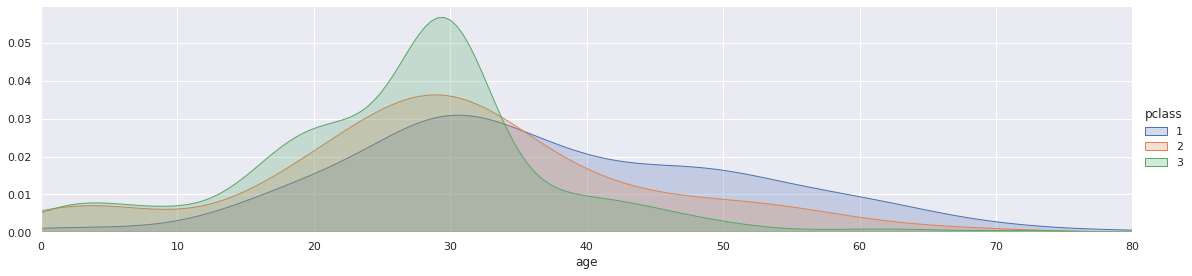

In [48]:
fig = sns.FacetGrid(df1, hue="pclass",aspect=4,height=4)
fig.map(sns.kdeplot,'age',shade= True)
oldest = df1['age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()

insights:
* first class passengers had relatively more older passengers than any other class.
* passengers between the ages 15 and 34 were mostly from thirdclass.
* children less than 10 years were mostly from third class and second class

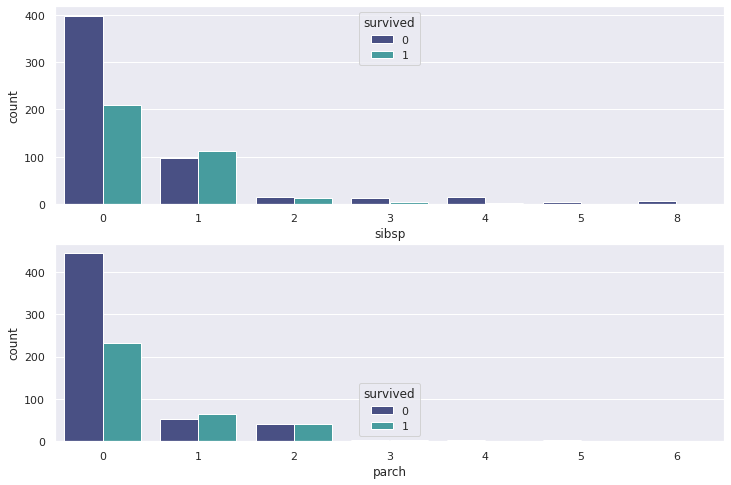

In [49]:
#checking the distributions between in the Sibsp and parch variables with the chances of surviving
sns.set(rc={'figure.figsize':(12,8)})
plt.title('Countplots')
plt.subplot(211)
sns.countplot(x="sibsp", hue='survived', data=df1,palette='mako')
plt.subplot(212)
sns.countplot(x="parch", hue='survived', data=df1,palette='mako')
plt.show()

* The above plots shows the distributions of features 'sibsp' and 'parch'.
Both share some common attribute that most passengers belonged to 'sibsp' and 'parch' 0, and the number of passengers who did not survive predominantly in that category.
* In 'sibsp' and 'parch'  1, the number of passengers who survived were greater than those who did not   


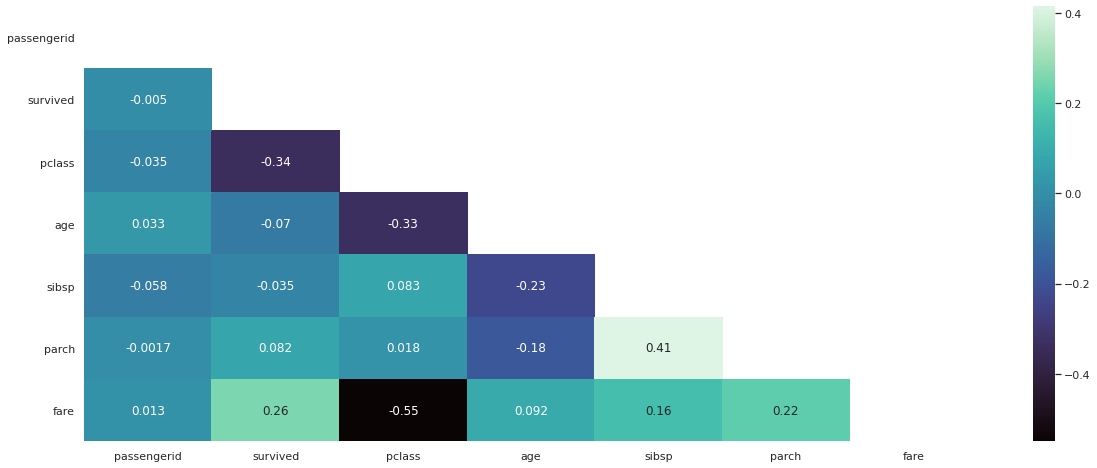

In [51]:
# checking for correlations between the variables
mask = np.zeros_like(df1.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20,8))
    ax = sns.heatmap(df1.corr(),

mask=mask,annot=True,cmap="mako")

insights:

* the pclass feature has moderate negative correlataion with the feature fare.while a moderate positive correlation is seen between sibsp and parch

#### Encoding categorical features

In [52]:
# One-hot encode the data using pandas get_dummies
df1 = pd.get_dummies(df1,columns=['sex'],drop_first=True)

df1 = pd.get_dummies(df1,columns=['embarked'],drop_first=False)


df2 = pd.get_dummies(df2,columns=['sex'],drop_first=True)

df2 = pd.get_dummies(df2,columns=['embarked'],drop_first=False)



In [53]:
# checking the train dataset
df1.head(3)

,passengerid,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_C,embarked_Q,embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1


In [54]:
# checking the test dataset

df2.head(3)

,passengerid,pclass,age,sibsp,parch,fare,sex_male,embarked_C,embarked_Q,embarked_S
0,892,3,34.5,0,0,7.8292,1,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,0,1
2,894,2,62.0,0,0,9.6875,1,0,1,0


#  Implementing the Solution

feature selection
------------

* In order to reduce the amount of data to feed to our model we are to use a reduction technique


Adopting the random forest for feature selection

* This will attempt to find features that  will be more useful in predicting the 'survived' label


In [74]:
feat = df1.drop(['survived','passengerid'], 1)
survived_label = df1['survived']

# Import the model
from sklearn.ensemble import RandomForestClassifier

tree = RandomForestClassifier(n_estimators = 100)
tree = forest.fit(feat, survived_label)


In [75]:
# Get numerical feature importances
importances = list(tree.feature_importances_)


test_features=feat.columns.to_list()

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


[('pclass', 0.09), ('age', 0.26), ('sibsp', 0.05), ('parch', 0.04), ('fare', 0.26), ('sex_male', 0.27), ('embarked_C', 0.01), ('embarked_Q', 0.01), ('embarked_S', 0.02)]

Variable: sex_male             Importance: 0.27
Variable: age                  Importance: 0.26
Variable: fare                 Importance: 0.26
Variable: pclass               Importance: 0.09
Variable: sibsp                Importance: 0.05
Variable: parch                Importance: 0.04
Variable: embarked_S           Importance: 0.02
Variable: embarked_C           Importance: 0.01
Variable: embarked_Q           Importance: 0.01


as shown above , the gender feature ie sex_male , age and fare show more importance in 

In [109]:
# splitting further the train dataset 
# 
X = df1[['sex_male','age','fare']].values
y = survived_label.values

In [110]:
#  Rescaling our data
from sklearn.preprocessing import normalize
X = normalize(X, norm='l2')

In [111]:
# splitting to train and test sets with an 80% training dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Determining the best parameters for the model through hyperparameter tuning

In [112]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()

parameters = [{'n_neighbors': np.arange(3,13,2), 'weights': ['uniform'], 'algorithm' : ['ball_tree', 'kd_tree', 'brute'], 'metric':['minkowski', 'euclidean', 'manhattan', 'chebyshev']},
              {'n_neighbors': np.arange(3,13,2), 'weights': ['distance'], 'algorithm' : ['ball_tree', 'kd_tree', 'brute'], 'metric':['minkowski', 'euclidean', 'manhattan', 'chebyshev']}]

# finding the accuracy on the 10 test folds
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters,cv = 10, n_jobs = -1)

grid_search.fit(X_train, y_train)
print('These are the best parameters for the model using a 10fold cross validation :\n', grid_search.best_estimator_)

These are the best parameters for the model using a 10fold cross validation :
 KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')


Adopting the best parameters to our KNN model
----------

In [113]:
# Training and Predictions
# ---
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(algorithm='ball_tree',metric='manhattan',n_neighbors=5,weights='uniform')
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [114]:
#  making predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [115]:
# Evaluating the Algorithm
# ---
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[82 21]
 [26 50]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       103
           1       0.70      0.66      0.68        76

    accuracy                           0.74       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179



* The model gave an acuracy score of 0.78. This shall serve as our basemodel

consolidating the test dataset from the datasource
--------

In [116]:
X = df2[['sex_male','age','fare']].values

#  Rescaling our data
from sklearn.preprocessing import normalize
X = normalize(X, norm='l2')


In [119]:
df2.shape[0]

418

In [135]:
ytest = y[:418]

In [138]:
#  making predictions on our test data
# ---
# 
y_pred = classifier.predict(X)

# Evaluating the Algorithm
# ---
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest, y_pred))
print(classification_report(ytest, y_pred))

[[152 103]
 [107  56]]
              precision    recall  f1-score   support

           0       0.59      0.60      0.59       255
           1       0.35      0.34      0.35       163

    accuracy                           0.50       418
   macro avg       0.47      0.47      0.47       418
weighted avg       0.50      0.50      0.50       418



Attempting to improve the accuracy score
-----------
* Using the dimensionality reduction technique ie LDA to select features.
* Note that some of the methods used to improve the model have already been applied through hyperparameter tuning 


In [90]:
# data reduction

# Separating our target label from the other features
feat = df1.drop(['survived','passengerid'], 1)
survived_label = df1['survived']
# Subject our features to LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Create an instance of LDA
lda = LDA()
lda = lda.fit(feat, survived_label)
lda_feat = lda.transform(feat)
#lda coefficients
lda.coef_
# Since the coefficients are in an array, we need to create a dataframe so that we can extract the name of the columns
f_imp = pd.DataFrame(index=feat.columns.values, data=lda.coef_[0].T)
f_imp.sort_values(0, ascending=False)

,0
embarked_C,0.209249
embarked_Q,0.202486
fare,0.002042
age,-0.041064
parch,-0.113364
embarked_S,-0.241644
sibsp,-0.289563
pclass,-1.206827
sex_male,-3.539895


In [95]:
# using the top most features 
# splitting further the train dataset 
# 
X = df1[['embarked_C','embarked_Q','fare']].values
y = survived_label.values

In [96]:
#  Rescaling our data
from sklearn.preprocessing import normalize
X = normalize(X, norm='l2')

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [98]:
# Training and Predictions
# ---
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(algorithm='ball_tree',metric='manhattan',n_neighbors=5,weights='uniform')
classifier.fit(X_train, y_train)

#  making predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
# ---
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[108   7]
 [ 44  20]]
              precision    recall  f1-score   support

           0       0.71      0.94      0.81       115
           1       0.74      0.31      0.44        64

    accuracy                           0.72       179
   macro avg       0.73      0.63      0.62       179
weighted avg       0.72      0.72      0.68       179



* using the top three coefficients from the LDA gave a lower accuracy score (0.72) as compared to using the top three features from our base model

consolidating the test dataset from the datasource
--------

In [139]:
X = df2[['embarked_C','embarked_Q','fare']].values

#  Rescaling our data
from sklearn.preprocessing import normalize
X = normalize(X, norm='l2')


In [140]:
#  making predictions on our test data
# ---
# 
y_pred = classifier.predict(X)

# Evaluating the Algorithm
# ---
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest, y_pred))
print(classification_report(ytest, y_pred))

[[  2 253]
 [  0 163]]
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       255
           1       0.39      1.00      0.56       163

    accuracy                           0.39       418
   macro avg       0.70      0.50      0.29       418
weighted avg       0.76      0.39      0.23       418



# Challenging the solution

To check if the accuracy score can be improved further,
* should implement more feature engineering such as creation of new features
* exploring other classification models
* using all the features

# Conclusions

* The KNN 'base model' had an average accuracy score (0.5) under feature  selection from the random forest but performed better than the model from LDA feature selection which had an accuracy of 0.39.
* Some methods that would assist in increasing the accuracy are listed under challenging the solution section